In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [3]:
Diabetes = pd.read_csv('diabetes.csv')
Diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [4]:
Diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 769 entries, 0 to 768
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               769 non-null    int64  
 1   Glucose                   769 non-null    int64  
 2   BloodPressure             769 non-null    int64  
 3   SkinThickness             769 non-null    int64  
 4   Insulin                   769 non-null    int64  
 5   BMI                       769 non-null    float64
 6   DiabetesPedigreeFunction  769 non-null    float64
 7   Age                       769 non-null    int64  
 8   Outcome                   769 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.2 KB


In [6]:
Diabetes.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,769.0,3.840052,3.370237,0.000,1.000,3.000,6.000,17.00
Glucose,769.0,120.897269,31.951886,0.000,99.000,117.000,140.000,199.00
BloodPressure,769.0,69.115735,19.345296,0.000,62.000,72.000,80.000,122.00
SkinThickness,769.0,20.509753,15.959020,0.000,0.000,23.000,32.000,99.00
Insulin,769.0,79.697009,115.203999,0.000,0.000,29.000,127.000,846.00
BMI,769.0,31.998179,7.880557,0.000,27.300,32.000,36.600,67.10
DiabetesPedigreeFunction,769.0,0.471590,0.331208,0.078,0.244,0.371,0.626,2.42
Age,769.0,33.269181,11.778737,21.000,24.000,29.000,41.000,81.00
Outcome,769.0,0.349805,0.477219,0.000,0.000,0.000,1.000,1.00


In [8]:
Diabetes.dropna()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [9]:
df = Diabetes

In [10]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Which feature has the highest correlation with diabetes?

In [11]:
print(df.corr()['Outcome'].sort_values(ascending=False))

Outcome                     1.000000
Glucose                     0.466132
BMI                         0.293253
Age                         0.240816
Pregnancies                 0.219418
DiabetesPedigreeFunction    0.172406
Insulin                     0.129137
SkinThickness               0.072298
BloodPressure               0.065706
Name: Outcome, dtype: float64


## What percentage of patients have diabetes in this dataset?

In [58]:
Outcome =df['Outcome'].value_counts()*100/len(df)
Outcome

Outcome
0    65.019506
1    34.980494
Name: count, dtype: float64

In [22]:
df['Outcome'].value_counts()

Outcome
0    500
1    269
Name: count, dtype: int64

## How many rows have insulin = 0? Is that realistic?

In [59]:
(df['Insulin'] == 0).sum()

374

## What is the distribution of BMI? Are there outliers?

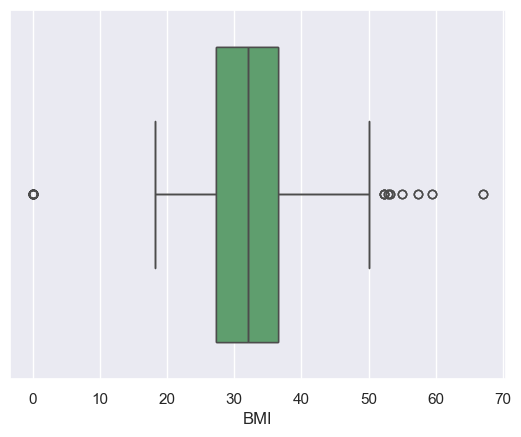

In [62]:
sns.boxplot(x=df['BMI'])
plt.show()

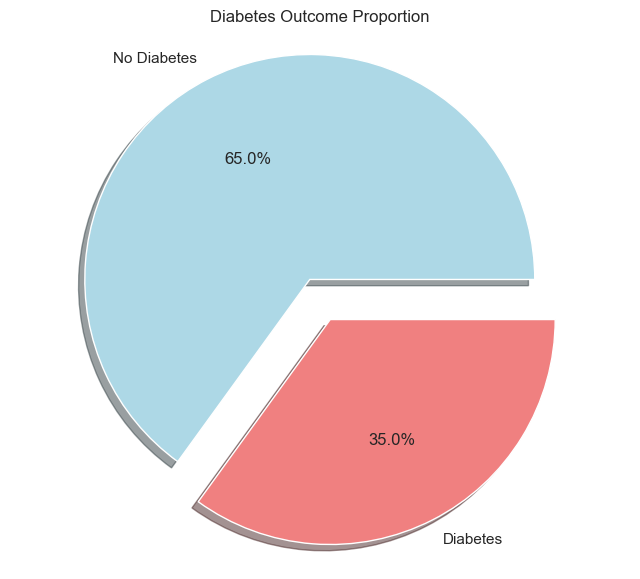

In [24]:
explode1 = [0.1, 0.1]
plt.figure(figsize=(8,7))
plt.pie(Outcome, explode=explode1,shadow = True,labels=['No Diabetes', 'Diabetes'], autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
plt.title('Diabetes Outcome Proportion')
plt.axis('equal')
plt.show()

## What is the average glucose level for diabetic vs non-diabetic patients?

In [67]:
glucose_by_outcome = df.groupby('Outcome')['Glucose'].mean().reset_index()
glucose_by_outcome

,Outcome,Glucose
0,0,109.980000
1,1,141.189591


<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

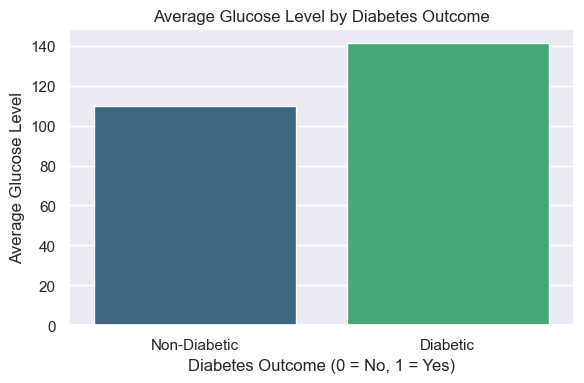

In [68]:
plt.figure(figsize=(6,4))
sns.barplot(data=glucose_by_outcome, x='Outcome', y='Glucose', palette='viridis')

# Titles and labels
plt.title('Average Glucose Level by Diabetes Outcome')
plt.xlabel('Diabetes Outcome (0 = No, 1 = Yes)')
plt.ylabel('Average Glucose Level')
plt.xticks([0, 1], ['Non-Diabetic', 'Diabetic'])

# Show it
plt.tight_layout()
plt.show()

## What’s the average age of diabetic vs non-diabetic patients?

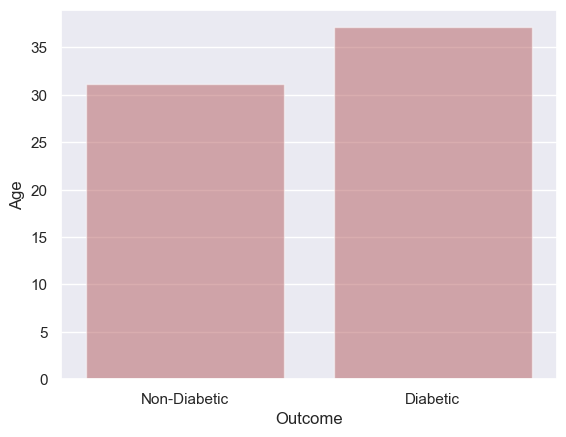

In [69]:
df_filtered = df.groupby('Outcome')['Age'].mean().reset_index()
sns.barplot(y=df_filtered['Age'], x=df_filtered['Outcome'],color='r',alpha=.5)
plt.xticks([0, 1], ['Non-Diabetic', 'Diabetic'])
plt.show()

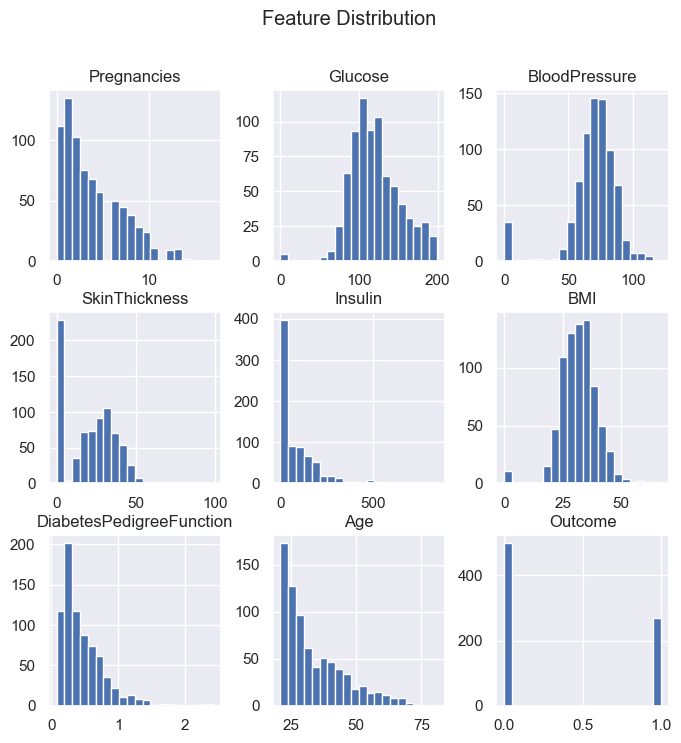

In [28]:
df.hist(bins=20, figsize=(8, 8))
plt.suptitle('Feature Distribution')
plt.show()

## Age Distribution by Diabetes Status

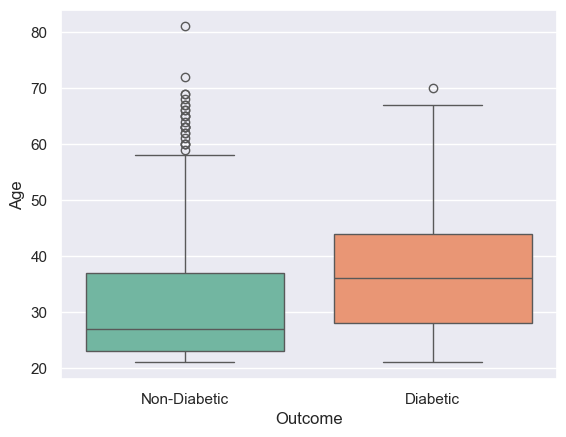

In [70]:
sns.boxplot(x='Outcome', y='Age', data=df, palette='Set2')
plt.xticks([0, 1], ['Non-Diabetic', 'Diabetic'])
plt.show()

## Distribution of Pregnancy Counts Among All Patients

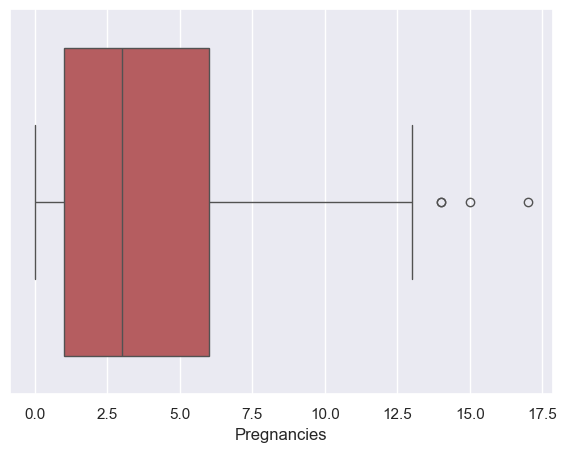

In [34]:
plt.figure(figsize=(7,5))
sns.boxplot(x=df['Pregnancies'], color="r")
plt.show()

## Relationship Between Age and Glucose by Diabetes Outcome

In [75]:
df['Outcome_labeled'] = df['Outcome'].replace({1: 'Diabetic',0: 'Non-Diabetic'})

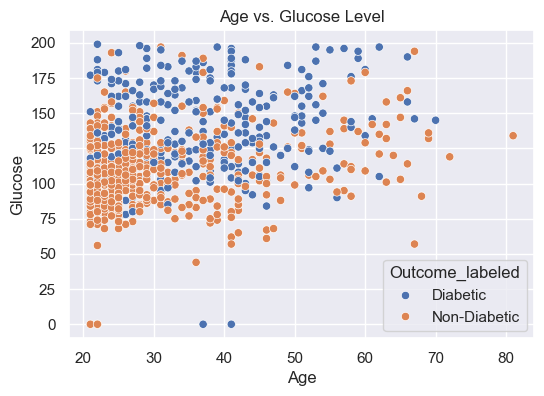

In [76]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Age', y='Glucose', data=df, hue='Outcome_labeled')
plt.title('Age vs. Glucose Level')
plt.show()

## BMI vs Age, Colored by Diabetes Outcome

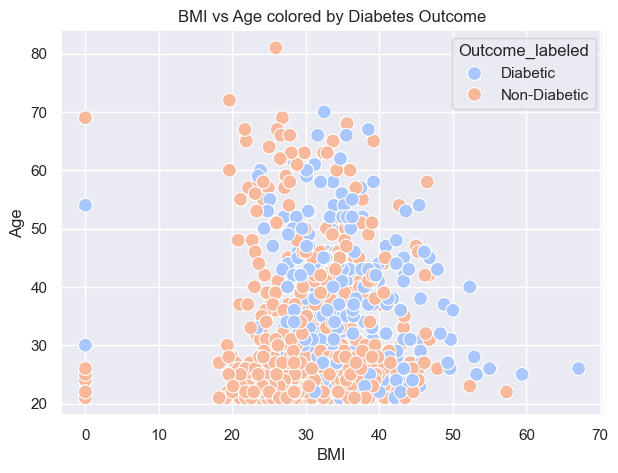

In [77]:
plt.figure(figsize=(7, 5))
sns.scatterplot(x='BMI', y='Age', hue='Outcome_labeled', data=df, palette='coolwarm', s=100)
plt.title('BMI vs Age colored by Diabetes Outcome')

plt.show()

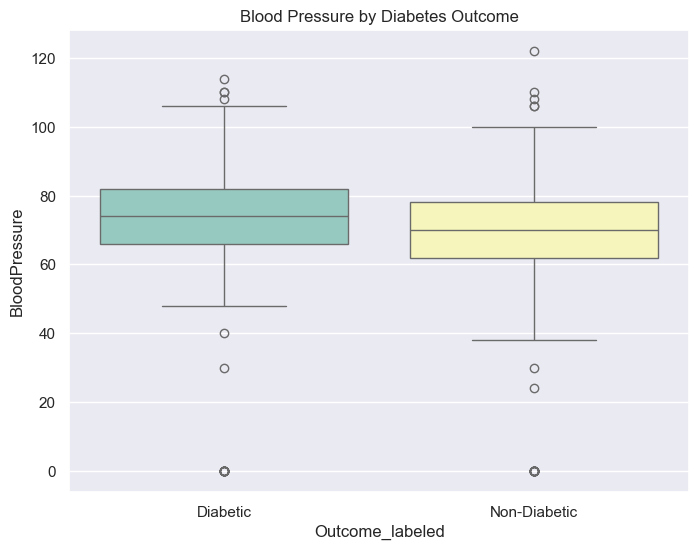

In [78]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Outcome_labeled', y='BloodPressure', data=df, palette='Set3')
plt.title('Blood Pressure by Diabetes Outcome')
plt.show()

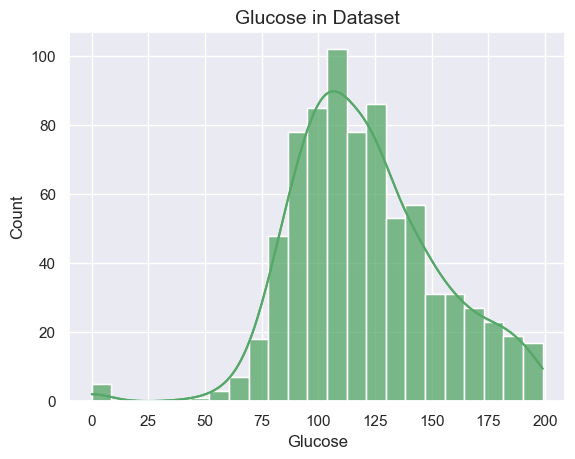

In [45]:
sns.histplot(df['Glucose'],color='g',kde=True)
plt.title('Glucose in Dataset', fontsize=14)
plt.show()

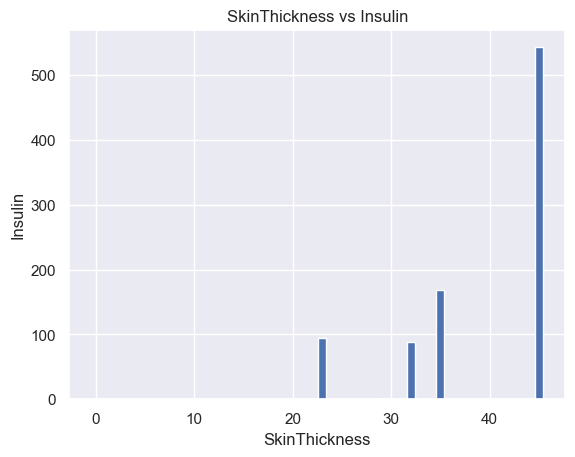

In [53]:
x=df['SkinThickness'].head(10)
y=df['Insulin'].head(10)
plt.bar(x,y)
plt.xlabel('SkinThickness')
plt.ylabel('Insulin')
plt.title('SkinThickness vs Insulin')
plt.show()

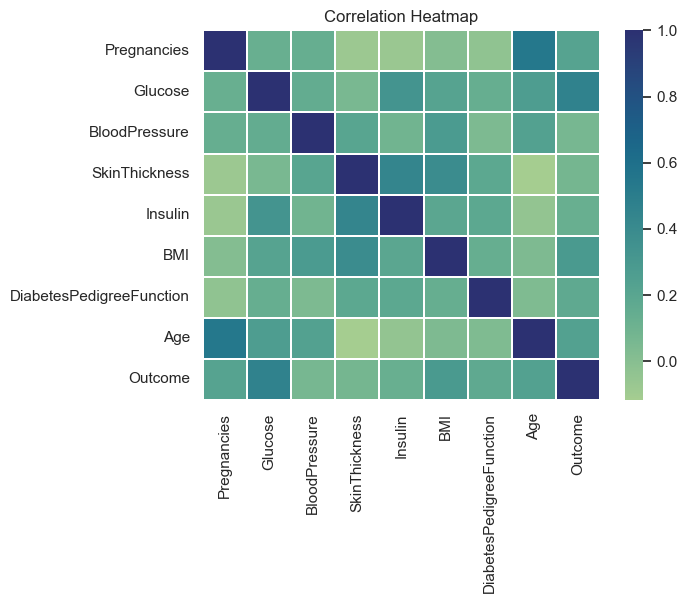

In [54]:
sns.heatmap(df.corr(),cmap='crest',linewidths=.1 )
plt.title('Correlation Heatmap')
plt.show()

## Is there a linear relationship between BMI and Insulin?

In [79]:
df[df['Insulin'] > 0][['BMI', 'Insulin']].corr()

,BMI,Insulin
BMI,1.000000,0.226265
Insulin,0.226265,1.000000


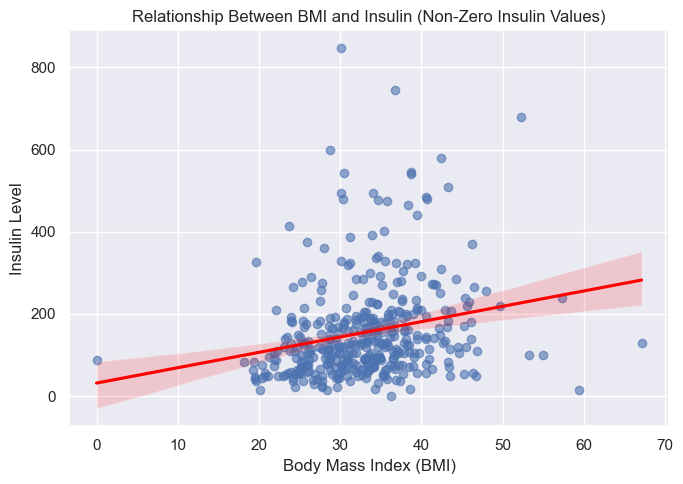

In [80]:
# Filter data
filtered_df = df[df['Insulin'] > 0]

# Create scatterplot with regression line
plt.figure(figsize=(7, 5))
sns.regplot(x='BMI', y='Insulin', data=filtered_df, scatter_kws={'alpha':0.6}, line_kws={'color':'red'})

plt.title('Relationship Between BMI and Insulin (Non-Zero Insulin Values)')
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Insulin Level')
plt.tight_layout()
plt.show()